In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import os

# Load the dataset
path = '/Users/andrewfearney27/Downloads/Dataset-weather-prediction-dataset-scaled.csv'
data = pd.read_csv(path)


In [201]:
#Reduce to just the mean temperatures
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',b
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

SyntaxError: invalid syntax (1895849879.py, line 17)

In [197]:
df

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
21915,2020-01-01,-1.599964,-1.465688,-1.209812,-0.934476,-1.459245,-1.387053,-0.735776,-1.102331,-0.005705,-1.370824,-1.612392,-1.123071,-1.032352,-0.550620,-0.000746,-0.153581,-0.478156,-0.869139,-0.007287
21916,2020-01-02,-1.599964,-1.397785,-1.141717,-1.169744,-0.968756,-1.225060,-0.953178,-0.595665,-0.005705,-1.625113,-0.997267,-1.203946,-1.321402,-0.283654,-0.000746,-0.051205,-0.192023,-0.414197,-0.007287
21917,2020-01-03,-1.599964,-0.691591,-1.357351,-1.569699,-0.383334,-0.444548,-0.799717,-0.386009,-0.005705,-1.419260,-0.397145,-1.500486,-0.693033,-0.235114,-0.000746,0.007295,-0.241785,-0.288696,-0.007287
21918,2020-01-04,-1.599964,-0.596526,-1.504889,-1.063873,-0.525734,-0.827441,-0.556739,-0.980032,-0.005705,-1.104426,-0.772222,-1.069155,-0.592494,-0.696239,-0.000746,-0.694709,-0.615003,-0.978952,-0.007287
21919,2020-01-05,-1.599964,-1.180494,-1.050924,-1.040346,-0.494089,-0.635995,-0.722987,-0.648078,-0.005705,-1.225516,-0.637194,-1.176988,-0.818707,-0.793317,-0.000746,-1.382089,-0.901136,-0.822076,-0.007287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22276,2020-12-27,1.594371,-1.180494,-1.130368,-1.369721,-0.794712,-0.871621,-1.017119,-0.875205,-0.005705,-1.382933,-0.877243,-1.635277,-1.396806,-0.429272,-0.000746,-1.148087,-0.391072,-0.947577,-0.007287
22277,2020-12-28,1.594371,-0.786655,-0.528863,-0.863895,-1.016223,-0.945254,-0.710199,-1.783711,-0.005705,-1.261843,-1.087286,-1.244383,-1.095189,-0.623429,-0.000746,-1.177337,-0.391072,-1.135828,-0.007287
22278,2020-12-29,1.594371,-0.813817,-0.131643,-0.346305,-1.000401,-1.357599,-0.480009,-1.539113,-0.005705,-0.947009,-1.207310,-1.406132,-0.781005,-0.502081,-0.000746,-1.235838,-0.366191,-1.041702,-0.007287
22279,2020-12-30,1.594371,-1.058269,-0.052199,-0.499230,-0.921290,-1.048340,-0.838082,-1.521642,-0.005705,-0.934900,-1.012270,-1.365695,-0.856409,-0.574890,-0.000746,-1.279713,-0.565240,-1.120141,-0.007287


In [198]:
#Convert 'DATE' to datetime and filter for the year 2020
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')
data2020 = data[data['DATE'].dt.year == 2020]

#Select only the mean temperature for Stockholm
columns_of_interest = ['DATE', 'STOCKHOLM_temp_mean']
data2020 = data2020[columns_of_interest]

#Create an index for days of the year
data2020['Day'] = data2020['DATE'].dt.dayofyear

# Prepare X and y for gradient descent
X = data2020['Day'].values.reshape(-1, 1)  # Day of year as X
y = data2020['STOCKHOLM_temp_mean'].values  # Stockholm temperature as y

#Normalise X
X = (X - X.mean()) / X.std()

#Add intercept term
X = np.c_[np.ones(X.shape[0]), X]

#Gradient Descent Setup
theta = np.zeros(2)  # Two parameters including intercept
alpha = 0.01
iterations = 1000

#Define the cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    sqErrors = (predictions - y) ** 2
    J = 1 / (2 * m) * np.sum(sqErrors)
    return J

#Define the gradient descent function
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    J_history = np.zeros(num_iterations)
    for i in range(num_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        updates = alpha / m * X.T.dot(errors)
        theta -= updates
        J_history[i] = compute_cost(X, y, theta)
    return theta, J_history



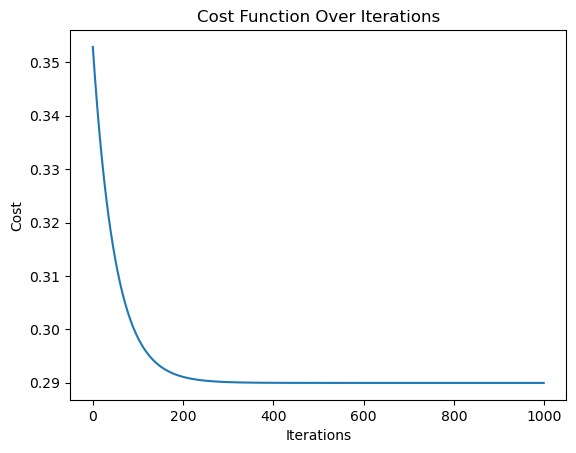

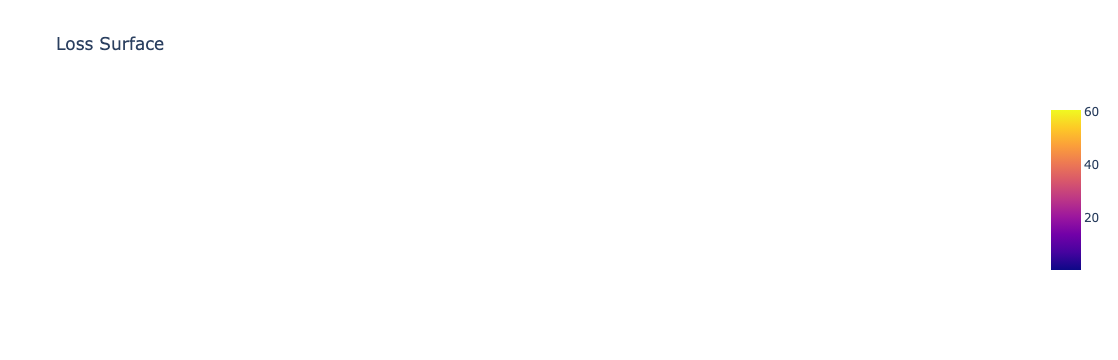

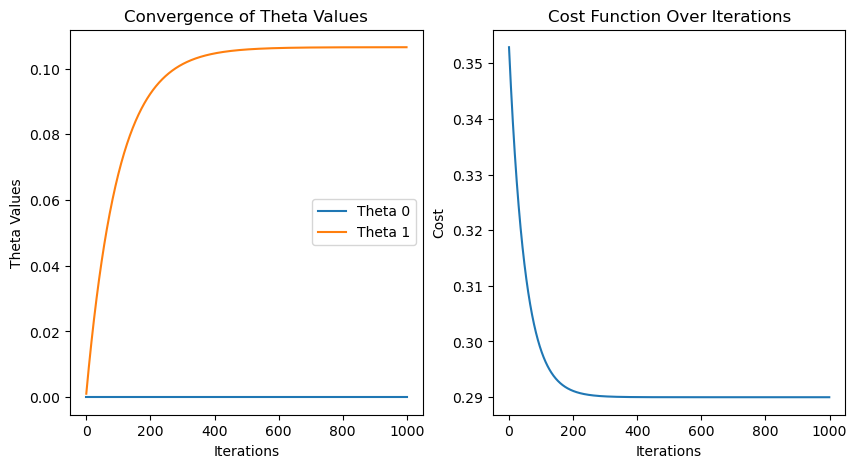

In [190]:
# Assuming theta_history is a list of tuples (theta0, theta1)
theta0_history, theta1_history = zip(*theta_history)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(theta0_history, label='Theta 0')
plt.plot(theta1_history, label='Theta 1')
plt.title('Convergence of Theta Values')
plt.xlabel('Iterations')
plt.ylabel('Theta Values')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(J_history)
plt.title('Cost Function Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()



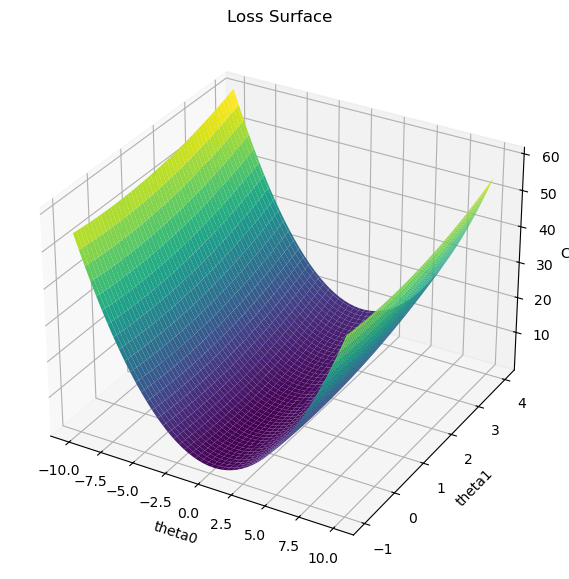

In [191]:
#3D loss surface plotting
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        t = np.array([theta0, theta1])
        J_vals[j, i] = compute_cost(X, y, t)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(T0, T1, J_vals, cmap='viridis')
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('Cost')
ax.set_title('Loss Surface')
plt.show()

In [192]:
#Q7
def prepare_and_run_analysis(city, year, data):
    city_column = f'{city}_temp_mean'
    city_data = data[(data['DATE'].dt.year == year)][['DATE', city_column]].dropna()
    if city_data.empty:
        return None
    city_data['Day'] = city_data['DATE'].dt.dayofyear
    X = (city_data['Day'] - city_data['Day'].mean()) / city_data['Day'].std()
    X = np.c_[np.ones(X.shape[0]), X]
    y = city_data[city_column].values
    # Gradient descent parameters
    theta = np.zeros(2)
    alpha = 0.01
    iterations = 1000
    theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
    return theta, cost_history


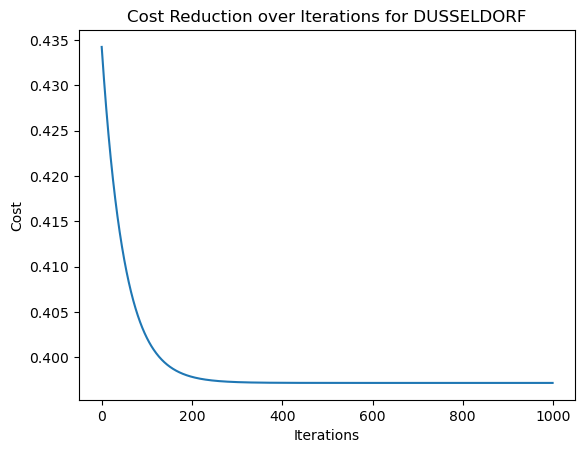

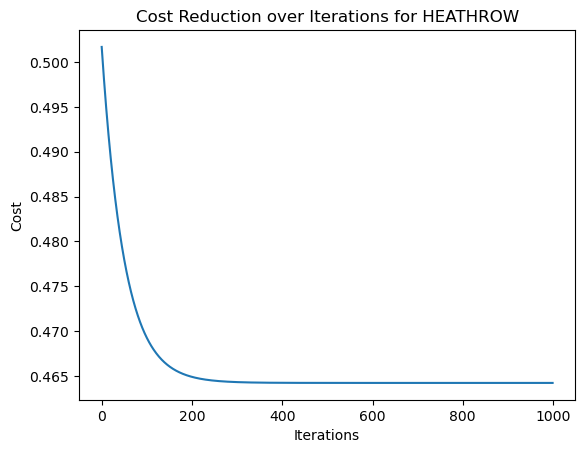

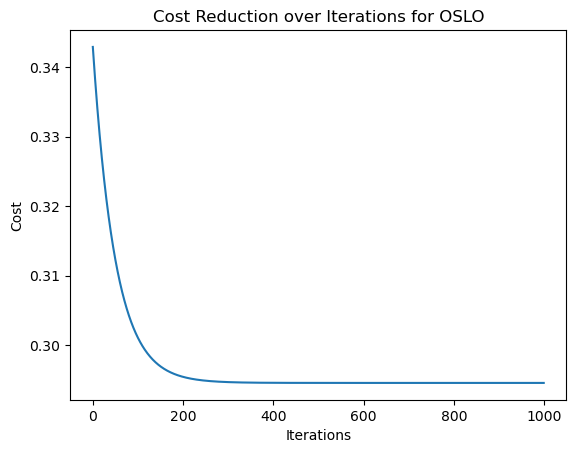

In [193]:
results = {}
for city in ['DUSSELDORF', 'HEATHROW', 'OSLO']:
    result = prepare_and_run_analysis(city, 2020, data)
    if result:
        theta, cost_history = result
        plt.figure()
        plt.plot(cost_history)
        plt.title(f'Cost Reduction over Iterations for {city}')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.show()
        results[city] = {'theta': theta, 'final_cost': cost_history[-1]}


In [194]:
#Q7
# Define a function to run gradient descent
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    for i in range(num_iters):
        predictions = X.dot(theta)
        errors = predictions - y
        sum_delta = (alpha / m) * (X.T.dot(errors))
        theta -= sum_delta
        J_history.append(np.sum(errors**2) / (2 * m))
    return theta, J_history

# Function to prepare data and run the analysis
def prepare_and_run_analysis(city, year, data):
    city_column = f'{city}_temp_mean'
    if city_column not in data.columns or year not in data['DATE'].dt.year.unique():
        print(f"No data available for {city} in {year}")
        return None

    city_data = data[(data['DATE'].dt.year == year) & (data[city_column].notna())]

    if city_data.empty:
        print(f"No data available for {city} in {year}")
        return None
    
    city_data['Day'] = city_data['DATE'].dt.dayofyear

    # Normalize the features
    X = city_data['Day']
    X = (X - X.mean()) / X.std()
    X = np.c_[np.ones(len(X)), X]  # Add intercept term

    y = city_data[city_column].values

    # Initialize theta
    theta = np.zeros(2)
    alpha = 0.01
    iterations = 1000

    # Run gradient descent
    theta, J_history = gradient_descent(X, y, theta, alpha, iterations)

    # Plot the results
    plt.figure()
    plt.plot(J_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title(f'Cost Reduction over Iterations for {city} {year}')
    plt.show()

    return theta, J_history[-1]

# Load data
data = pd.read_csv('/Users/andrewfearney27/Downloads/Dataset-weather-prediction-dataset-scaled.csv')
data['DATE'] = pd.to_datetime(data['DATE'])

# Select cities and year
cities = ['DUSSELDORF', 'HEATHROW', 'OSLO']
year = 2020

results = {}
for city in cities:
    result = prepare_and_run_analysis(city, year, data)
    if result:
        theta, final_cost = result
        results[city] = {'theta': theta, 'final_cost': final_cost}

# Display results
for city, res in results.items():
    print(city, "Theta:", res['theta'], "Final cost:", res['final_cost'])


No data available for DUSSELDORF in 2020
No data available for HEATHROW in 2020
No data available for OSLO in 2020


In [204]:

data_path = '/Users/andrewfearney27/Downloads/Dataset-weather-prediction-dataset-scaled.csv'
data = pd.read_csv(data_path)
data['DATE'] = pd.to_datetime(data['DATE'])

# Function to prepare data and run gradient descent
def prepare_and_run_analysis(city, year, data):
    temperature_column = f'{city}_temp_mean'
    city_data = data[(data['DATE'].dt.year == year)][['DATE', temperature_column]].dropna()
    
    if city_data.empty:
        print(f"No data available for {city} in {year}")
        return None
    
    city_data['Day'] = city_data['DATE'].dt.dayofyear
    X = (city_data['Day'] - city_data['Day'].mean()) / city_data['Day'].std()
    y = city_data[temperature_column].values
    
    # Reshape X for compatibility with libraries expecting 2D array inputs
    X = X.reshape(-1, 1)

    # Gradient descent setup
    theta = np.zeros(2)
    alpha = 0.01
    iterations = 1000

    # Gradient descent function
    def gradient_descent(X, y, theta, alpha, num_iters):
        m = len(y)
        X_b = np.c_[np.ones((m, 1)), X]  # add x0 = 1 to each instance
        for i in range(num_iters):
            gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
            theta = theta - alpha * gradients
        return theta

    # Running gradient descent
    theta_final = gradient_descent(X, y, theta, alpha, iterations)
    return theta_final

# Example cities and year to analyze
cities = ['DUSSELDORF', 'HEATHROW', 'OSLO']
year = 2020

for city in cities:
    theta = prepare_and_run_analysis(city, year, data)
    if theta is not None:
        print(f"Results for {city} {year}: {theta}")

No data available for DUSSELDORF in 2020
No data available for HEATHROW in 2020
No data available for OSLO in 2020
